# MODULE IMPORT

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings ("ignore")
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# DATA LOADING

In [2]:
ev=pd.read_csv(r"ev_charging_dataset.csv")
ev

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type
0,3b92b5db-0af,Tesla Model 3 LR,81.1,2023-09-02 19:49:51,2023-09-02 20:27:03,56.57,0.62,Evening,19.1,80.4,23.7,8.3,Tesla_SC
1,ed23f97c-65e,Tesla Model 3 LR,81.4,2023-10-05 11:29:14,2023-10-05 12:14:50,68.21,0.76,Morning,25.9,97.6,22.5,7.8,Tesla_SC
2,22547c5e-478,Tesla Model 3 LR,77.7,2023-08-30 08:02:21,2023-08-30 21:18:33,50.72,13.27,Morning,36.1,97.2,32.6,6.1,AC_L2
3,e5452429-c85,Ford Mustang Mach-E,75.7,2023-04-07 20:06:19,2023-04-07 21:03:19,41.00,0.95,Evening,31.4,81.4,8.0,5.8,DC_CCS
4,a1d7f434-907,Tesla Model 3 LR,78.1,2023-01-07 17:14:12,2023-01-07 21:34:36,15.81,4.34,Evening,61.9,80.9,6.7,8.4,AC_L2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,905fb061-eca,Tesla Model 3 LR,84.6,2023-01-21 10:44:21,2023-01-21 11:32:21,67.62,0.80,Morning,21.8,93.6,10.8,7.3,Tesla_SC
9996,f07f4841-fee,Hyundai Kona Electric,62.9,2023-10-22 12:16:16,2023-10-22 20:11:28,32.22,7.92,Afternoon,47.5,97.0,25.4,7.8,AC_L2
9997,465ad542-410,Tesla Model 3 LR,74.3,2023-04-11 17:41:48,2023-04-12 03:26:12,27.28,9.74,Evening,49.7,83.5,17.4,8.4,AC_L2
9998,c85a76a5-b3c,Tesla Model 3 LR,75.3,2023-11-19 21:55:18,2023-11-20 06:39:06,32.37,8.73,Night,54.6,94.2,2.4,8.1,AC_L2


# EXPLORATOTARY DATA ANALYSIS

In [3]:
ev.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type
0,3b92b5db-0af,Tesla Model 3 LR,81.1,2023-09-02 19:49:51,2023-09-02 20:27:03,56.57,0.62,Evening,19.1,80.4,23.7,8.3,Tesla_SC
1,ed23f97c-65e,Tesla Model 3 LR,81.4,2023-10-05 11:29:14,2023-10-05 12:14:50,68.21,0.76,Morning,25.9,97.6,22.5,7.8,Tesla_SC
2,22547c5e-478,Tesla Model 3 LR,77.7,2023-08-30 08:02:21,2023-08-30 21:18:33,50.72,13.27,Morning,36.1,97.2,32.6,6.1,AC_L2
3,e5452429-c85,Ford Mustang Mach-E,75.7,2023-04-07 20:06:19,2023-04-07 21:03:19,41.00,0.95,Evening,31.4,81.4,8.0,5.8,DC_CCS
4,a1d7f434-907,Tesla Model 3 LR,78.1,2023-01-07 17:14:12,2023-01-07 21:34:36,15.81,4.34,Evening,61.9,80.9,6.7,8.4,AC_L2


In [4]:
ev.tail()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type
9995,905fb061-eca,Tesla Model 3 LR,84.6,2023-01-21 10:44:21,2023-01-21 11:32:21,67.62,0.80,Morning,21.8,93.6,10.8,7.3,Tesla_SC
9996,f07f4841-fee,Hyundai Kona Electric,62.9,2023-10-22 12:16:16,2023-10-22 20:11:28,32.22,7.92,Afternoon,47.5,97.0,25.4,7.8,AC_L2
9997,465ad542-410,Tesla Model 3 LR,74.3,2023-04-11 17:41:48,2023-04-12 03:26:12,27.28,9.74,Evening,49.7,83.5,17.4,8.4,AC_L2
9998,c85a76a5-b3c,Tesla Model 3 LR,75.3,2023-11-19 21:55:18,2023-11-20 06:39:06,32.37,8.73,Night,54.6,94.2,2.4,8.1,AC_L2
9999,418cdf94-a37,Chevy Bolt,64.4,2023-01-14 15:37:01,2023-01-15 00:50:49,30.61,9.23,Afternoon,54.0,98.1,10.7,7.6,AC_L2


In [5]:
ev.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,72.906760,40.553376,6.151710,38.183390,88.677240,18.542230,7.671070
std,16.220974,15.581563,6.785928,15.914261,7.455171,9.406132,3.481585
min,38.400000,3.670000,-1.906383,8.900000,6.400000,-5.600000,2.000000
25%,63.100000,28.760000,1.070000,25.300000,81.600000,11.400000,5.100000
50%,76.000000,40.205000,3.940000,34.500000,90.000000,18.200000,6.800000
75%,81.200000,50.810000,9.572500,51.000000,95.200000,25.900000,9.000000
max,140.300000,131.420949,67.520000,80.700000,100.000000,38.900000,16.000000


In [6]:
ev.isnull().sum()

User ID                      0
Vehicle Model                0
Battery Capacity (kWh)       0
Charging Start Time          0
Charging End Time            0
Energy Consumed (kWh)        0
Charging Duration (hours)    0
Time of Day                  0
State of Charge (Start %)    0
State of Charge (End %)      0
Temperature (C)              0
Vehicle Age (years)          0
Charger Type                 0
dtype: int64

In [7]:
ev.isna()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
ev.dropna()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type
0,3b92b5db-0af,Tesla Model 3 LR,81.1,2023-09-02 19:49:51,2023-09-02 20:27:03,56.57,0.62,Evening,19.1,80.4,23.7,8.3,Tesla_SC
1,ed23f97c-65e,Tesla Model 3 LR,81.4,2023-10-05 11:29:14,2023-10-05 12:14:50,68.21,0.76,Morning,25.9,97.6,22.5,7.8,Tesla_SC
2,22547c5e-478,Tesla Model 3 LR,77.7,2023-08-30 08:02:21,2023-08-30 21:18:33,50.72,13.27,Morning,36.1,97.2,32.6,6.1,AC_L2
3,e5452429-c85,Ford Mustang Mach-E,75.7,2023-04-07 20:06:19,2023-04-07 21:03:19,41.00,0.95,Evening,31.4,81.4,8.0,5.8,DC_CCS
4,a1d7f434-907,Tesla Model 3 LR,78.1,2023-01-07 17:14:12,2023-01-07 21:34:36,15.81,4.34,Evening,61.9,80.9,6.7,8.4,AC_L2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,905fb061-eca,Tesla Model 3 LR,84.6,2023-01-21 10:44:21,2023-01-21 11:32:21,67.62,0.80,Morning,21.8,93.6,10.8,7.3,Tesla_SC
9996,f07f4841-fee,Hyundai Kona Electric,62.9,2023-10-22 12:16:16,2023-10-22 20:11:28,32.22,7.92,Afternoon,47.5,97.0,25.4,7.8,AC_L2
9997,465ad542-410,Tesla Model 3 LR,74.3,2023-04-11 17:41:48,2023-04-12 03:26:12,27.28,9.74,Evening,49.7,83.5,17.4,8.4,AC_L2
9998,c85a76a5-b3c,Tesla Model 3 LR,75.3,2023-11-19 21:55:18,2023-11-20 06:39:06,32.37,8.73,Night,54.6,94.2,2.4,8.1,AC_L2


In [9]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User ID                    10000 non-null  object 
 1   Vehicle Model              10000 non-null  object 
 2   Battery Capacity (kWh)     10000 non-null  float64
 3   Charging Start Time        10000 non-null  object 
 4   Charging End Time          10000 non-null  object 
 5   Energy Consumed (kWh)      10000 non-null  float64
 6   Charging Duration (hours)  10000 non-null  float64
 7   Time of Day                10000 non-null  object 
 8   State of Charge (Start %)  10000 non-null  float64
 9   State of Charge (End %)    10000 non-null  float64
 10  Temperature (C)            10000 non-null  float64
 11  Vehicle Age (years)        10000 non-null  float64
 12  Charger Type               10000 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1015.8+ 

In [10]:
ev.drop_duplicates()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type
0,3b92b5db-0af,Tesla Model 3 LR,81.1,2023-09-02 19:49:51,2023-09-02 20:27:03,56.57,0.62,Evening,19.1,80.4,23.7,8.3,Tesla_SC
1,ed23f97c-65e,Tesla Model 3 LR,81.4,2023-10-05 11:29:14,2023-10-05 12:14:50,68.21,0.76,Morning,25.9,97.6,22.5,7.8,Tesla_SC
2,22547c5e-478,Tesla Model 3 LR,77.7,2023-08-30 08:02:21,2023-08-30 21:18:33,50.72,13.27,Morning,36.1,97.2,32.6,6.1,AC_L2
3,e5452429-c85,Ford Mustang Mach-E,75.7,2023-04-07 20:06:19,2023-04-07 21:03:19,41.00,0.95,Evening,31.4,81.4,8.0,5.8,DC_CCS
4,a1d7f434-907,Tesla Model 3 LR,78.1,2023-01-07 17:14:12,2023-01-07 21:34:36,15.81,4.34,Evening,61.9,80.9,6.7,8.4,AC_L2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,905fb061-eca,Tesla Model 3 LR,84.6,2023-01-21 10:44:21,2023-01-21 11:32:21,67.62,0.80,Morning,21.8,93.6,10.8,7.3,Tesla_SC
9996,f07f4841-fee,Hyundai Kona Electric,62.9,2023-10-22 12:16:16,2023-10-22 20:11:28,32.22,7.92,Afternoon,47.5,97.0,25.4,7.8,AC_L2
9997,465ad542-410,Tesla Model 3 LR,74.3,2023-04-11 17:41:48,2023-04-12 03:26:12,27.28,9.74,Evening,49.7,83.5,17.4,8.4,AC_L2
9998,c85a76a5-b3c,Tesla Model 3 LR,75.3,2023-11-19 21:55:18,2023-11-20 06:39:06,32.37,8.73,Night,54.6,94.2,2.4,8.1,AC_L2


In [11]:
EV=ev.drop(columns=['Session ID'],errors='ignore')

In [12]:
ev.select_dtypes(include='object').columns

Index(['User ID', 'Vehicle Model', 'Charging Start Time', 'Charging End Time',
       'Time of Day', 'Charger Type'],
      dtype='object')

In [13]:
ev['Charging Start Time']=pd.to_datetime(ev['Charging Start Time'])
ev['Charging End Time']=pd.to_datetime(ev['Charging End Time'])

In [14]:
(ev['Charging End Time']<ev['Charging Start Time']).sum()

np.int64(12)

In [15]:
ev=ev[ev['Charging Start Time']>=ev['Charging Start Time']]

In [16]:
# from start time

In [17]:
ev['Start_Hour']=ev['Charging Start Time'].dt.hour
ev['Start_Day']=ev['Charging Start Time'].dt.day
ev['Start_Month']=ev['Charging Start Time'].dt.month
ev['Start_Weekday']=ev['Charging Start Time'].dt.weekday

In [18]:
# from end time

In [19]:
ev['End_Hour']=ev['Charging End Time'].dt.hour

In [20]:
# charging duration

In [21]:
ev['Charging_Duration_Hours']=((ev['Charging End Time']-ev['Charging Start Time']).dt.total_seconds()/3600)

In [22]:
Ev=ev.drop(columns=['Charging Start Time','Charging End Time'])

In [23]:
Ev=ev.drop(columns=['Session ID'],errors='ignore')

In [24]:
# label encoder

In [25]:
le=LabelEncoder()
for col in ev.select_dtypes(include='object').columns:
    ev[col]=le.fit_transform(ev[col])

In [26]:
ev

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type,Start_Hour,Start_Day,Start_Month,Start_Weekday,End_Hour,Charging_Duration_Hours
0,102,9,81.1,2023-09-02 19:49:51,2023-09-02 20:27:03,56.57,0.62,1,19.1,80.4,23.7,8.3,4,19,2,9,5,20,0.62
1,455,9,81.4,2023-10-05 11:29:14,2023-10-05 12:14:50,68.21,0.76,2,25.9,97.6,22.5,7.8,4,11,5,10,3,12,0.76
2,63,9,77.7,2023-08-30 08:02:21,2023-08-30 21:18:33,50.72,13.27,2,36.1,97.2,32.6,6.1,1,8,30,8,2,21,13.27
3,433,3,75.7,2023-04-07 20:06:19,2023-04-07 21:03:19,41.00,0.95,1,31.4,81.4,8.0,5.8,2,20,7,4,4,21,0.95
4,293,9,78.1,2023-01-07 17:14:12,2023-01-07 21:34:36,15.81,4.34,1,61.9,80.9,6.7,8.4,1,17,7,1,5,21,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,262,9,84.6,2023-01-21 10:44:21,2023-01-21 11:32:21,67.62,0.80,2,21.8,93.6,10.8,7.3,4,10,21,1,5,11,0.80
9996,461,4,62.9,2023-10-22 12:16:16,2023-10-22 20:11:28,32.22,7.92,0,47.5,97.0,25.4,7.8,1,12,22,10,6,20,7.92
9997,127,9,74.3,2023-04-11 17:41:48,2023-04-12 03:26:12,27.28,9.74,1,49.7,83.5,17.4,8.4,1,17,11,4,1,3,9.74
9998,375,9,75.3,2023-11-19 21:55:18,2023-11-20 06:39:06,32.37,8.73,3,54.6,94.2,2.4,8.1,1,21,19,11,6,6,8.73


# VISUALIZATION

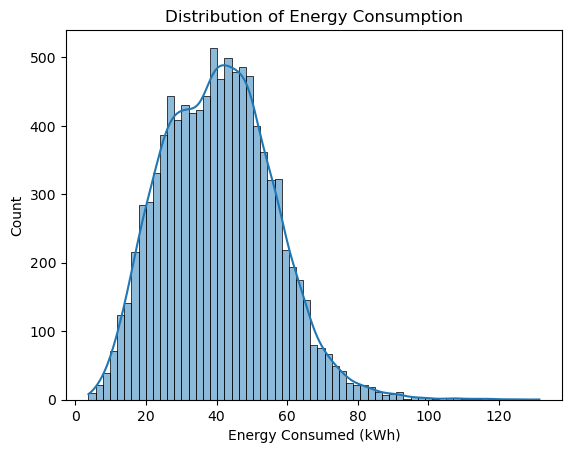

In [27]:
plt.figure()
sns.histplot(ev['Energy Consumed (kWh)'],kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumed (kWh)')
plt.show()

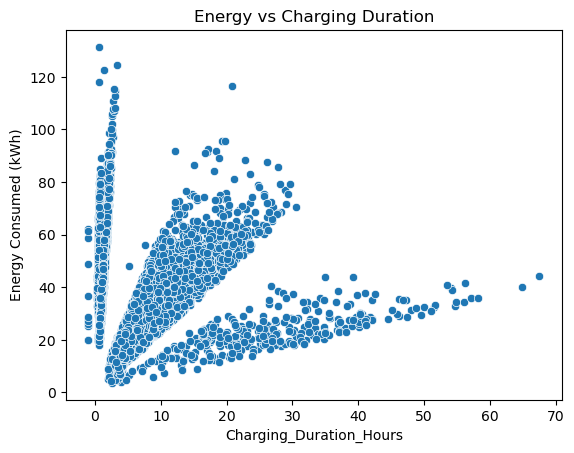

In [28]:
plt.figure()
sns.scatterplot(x=ev['Charging_Duration_Hours'],y=ev['Energy Consumed (kWh)'])
plt.title('Energy vs Charging Duration')
plt.show()

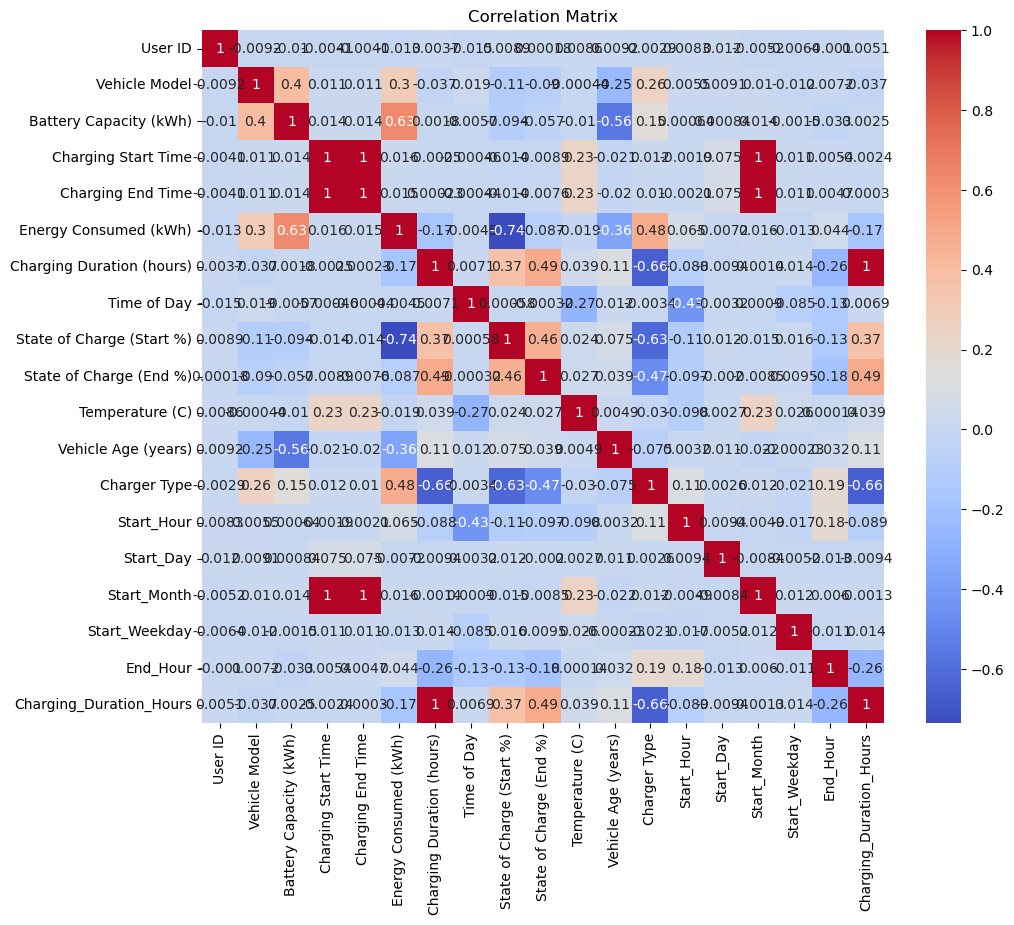

In [29]:
plt.figure(figsize=(11,9))
sns.heatmap(ev.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
x=ev.drop('Energy Consumed (kWh)',axis=1)
y=ev['Energy Consumed (kWh)']

In [31]:
x.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Charging Duration (hours),Time of Day,State of Charge (Start %),State of Charge (End %),Temperature (C),Vehicle Age (years),Charger Type,Start_Hour,Start_Day,Start_Month,Start_Weekday,End_Hour,Charging_Duration_Hours
0,102,9,81.1,2023-09-02 19:49:51,2023-09-02 20:27:03,0.62,1,19.1,80.4,23.7,8.3,4,19,2,9,5,20,0.62
1,455,9,81.4,2023-10-05 11:29:14,2023-10-05 12:14:50,0.76,2,25.9,97.6,22.5,7.8,4,11,5,10,3,12,0.76
2,63,9,77.7,2023-08-30 08:02:21,2023-08-30 21:18:33,13.27,2,36.1,97.2,32.6,6.1,1,8,30,8,2,21,13.27
3,433,3,75.7,2023-04-07 20:06:19,2023-04-07 21:03:19,0.95,1,31.4,81.4,8.0,5.8,2,20,7,4,4,21,0.95
4,293,9,78.1,2023-01-07 17:14:12,2023-01-07 21:34:36,4.34,1,61.9,80.9,6.7,8.4,1,17,7,1,5,21,4.34


In [32]:
y.head()

0    56.57
1    68.21
2    50.72
3    41.00
4    15.81
Name: Energy Consumed (kWh), dtype: float64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# MODEL CREATION

# LINEAR REGRESSION

In [34]:
ev.dtypes

User ID                               int64
Vehicle Model                         int64
Battery Capacity (kWh)              float64
Charging Start Time          datetime64[ns]
Charging End Time            datetime64[ns]
Energy Consumed (kWh)               float64
Charging Duration (hours)           float64
Time of Day                           int64
State of Charge (Start %)           float64
State of Charge (End %)             float64
Temperature (C)                     float64
Vehicle Age (years)                 float64
Charger Type                          int64
Start_Hour                            int32
Start_Day                             int32
Start_Month                           int32
Start_Weekday                         int32
End_Hour                              int32
Charging_Duration_Hours             float64
dtype: object

In [35]:
ev=ev.drop(columns=['Charging Start Time','Charging End Time'])

In [36]:
ev.dtypes

User ID                        int64
Vehicle Model                  int64
Battery Capacity (kWh)       float64
Energy Consumed (kWh)        float64
Charging Duration (hours)    float64
Time of Day                    int64
State of Charge (Start %)    float64
State of Charge (End %)      float64
Temperature (C)              float64
Vehicle Age (years)          float64
Charger Type                   int64
Start_Hour                     int32
Start_Day                      int32
Start_Month                    int32
Start_Weekday                  int32
End_Hour                       int32
Charging_Duration_Hours      float64
dtype: object

In [37]:
x=ev.drop('Energy Consumed (kWh)',axis=1)
y=ev['Energy Consumed (kWh)']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
pred_lr=lr.predict(x_test)
pred_lr

array([44.91561161, 86.41144989,  4.07609331, ..., 35.6821454 ,
       57.13007573, 32.38539011])

In [41]:
print('LinearRegression R2:',r2_score(y_test,pred_lr))

LinearRegression R2: 0.9565292186408619


In [42]:
print('LinearRegression MSE:',mean_squared_error(y_test,pred_lr))

LinearRegression MSE: 10.668432152290578


# RANDOM FOREST REGRESSOR

In [43]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
pred_rf=rf.predict(x_test)
pred_rf

array([42.3697, 87.8369, 12.2682, ..., 30.2788, 61.334 , 31.9179])

In [45]:
print('RandomForestRegressor R2:',r2_score(y_test,pred_rf))

RandomForestRegressor R2: 0.986274251813971


In [46]:
print('RandomForestRegressor MSE:',mean_squared_error(y_test,pred_rf))

RandomForestRegressor MSE: 3.3685203873450584


# DECISION TREE REGRESSOR

In [47]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
pred_dt=dt.predict(x_test)
pred_dt

array([42.76, 98.46, 11.91, ..., 25.18, 61.39, 33.12])

In [49]:
dt.score(x_test,y_test)

0.9279194696593778

In [50]:
print('MAE:',mean_absolute_error(y_test,pred_dt))

MAE: 2.1771603706765195


In [51]:
print('mse:',np.sqrt(mean_squared_error(y_test,pred_dt)))

mse: 4.205915694891664


In [52]:
print('R2 Score:',r2_score(y_test,pred_dt))

R2 Score: 0.9279194696593778


# CREATING PREDICTION FUNCTION

In [60]:
print(x.columns)


Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Duration (hours)', 'Time of Day', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Temperature (C)', 'Vehicle Age (years)',
       'Charger Type', 'Start_Hour', 'Start_Day', 'Start_Month',
       'Start_Weekday', 'End_Hour', 'Charging_Duration_Hours'],
      dtype='object')


In [61]:
# Take structure directly from training data
sample = x.iloc[[0]].copy()

# Now replace values (16 values required)
sample.iloc[0] = [
    101,    # User ID
    2,      # Vehicle Model (encoded)
    50,     # Battery Capacity (kWh)
    4,      # Charging Duration (hours)
    1,      # Time of Day (encoded)
    20,     # State of Charge (Start %)
    80,     # State of Charge (End %)
    30,     # Temperature (C)
    3,      # Vehicle Age (years)
    1,      # Charger Type (encoded)
    14,     # Start_Hour
    12,     # Start_Day
    6,      # Start_Month
    2,      # Start_Weekday
    18,     # End_Hour
    4       # Charging_Duration_Hours
]

prediction = rf.predict(sample)

print("Predicted Energy Consumed (kWh):", prediction[0])


Predicted Energy Consumed (kWh): 38.885


In [62]:
x = x.drop("User ID", axis=1)


In [63]:
import pickle

pickle.dump(rf, open("ev_model.pkl", "wb"))


In [65]:
import pickle

# Save model
pickle.dump(rf, open("ev_energy_model.pkl", "wb"))

# Save encoders dictionary
pickle.dump(le, open("label_encoders.pkl", "wb"))


In [68]:
pip install gradio


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import gradio as gr
import pandas as pd
import pickle

# Load trained model
model = pickle.load(open("ev_energy_model.pkl", "rb"))

def predict_energy(
    user_id,
    vehicle_model,
    battery_capacity,
    charging_duration,
    time_of_day,
    soc_start,
    soc_end,
    temperature,
    vehicle_age,
    charger_type,
    start_hour,
    start_day,
    start_month,
    start_weekday,
    end_hour,
    charging_duration_engineered
):

    input_data = pd.DataFrame([[
        user_id,
        vehicle_model,
        battery_capacity,
        charging_duration,
        time_of_day,
        soc_start,
        soc_end,
        temperature,
        vehicle_age,
        charger_type,
        start_hour,
        start_day,
        start_month,
        start_weekday,
        end_hour,
        charging_duration_engineered
    ]],
    columns=[
        'User ID',
        'Vehicle Model',
        'Battery Capacity (kWh)',
        'Charging Duration (hours)',
        'Time of Day',
        'State of Charge (Start %)',
        'State of Charge (End %)',
        'Temperature (C)',
        'Vehicle Age (years)',
        'Charger Type',
        'Start_Hour',
        'Start_Day',
        'Start_Month',
        'Start_Weekday',
        'End_Hour',
        'Charging_Duration_Hours'
    ])

    prediction = model.predict(input_data)

    return f"Predicted Energy Consumed: {prediction[0]:.2f} kWh"


interface = gr.Interface(
    fn=predict_energy,
    inputs=[gr.Number(label=col) for col in [
        'User ID',
        'Vehicle Model',
        'Battery Capacity (kWh)',
        'Charging Duration (hours)',
        'Time of Day',
        'State of Charge (Start %)',
        'State of Charge (End %)',
        'Temperature (C)',
        'Vehicle Age (years)',
        'Charger Type',
        'Start_Hour',
        'Start_Day',
        'Start_Month',
        'Start_Weekday',
        'End_Hour',
        'Charging_Duration_Hours'
    ]],
    outputs="text",
    title="EV Energy Consumption Prediction System"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [70]:
print(x.dtypes)


Vehicle Model                  int64
Battery Capacity (kWh)       float64
Charging Duration (hours)    float64
Time of Day                    int64
State of Charge (Start %)    float64
State of Charge (End %)      float64
Temperature (C)              float64
Vehicle Age (years)          float64
Charger Type                   int64
Start_Hour                     int32
Start_Day                      int32
Start_Month                    int32
Start_Weekday                  int32
End_Hour                       int32
Charging_Duration_Hours      float64
dtype: object
